## Description :
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.
Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc
As per the description and variables, this is the classifier problem. So I am going to use the following Algorithms to predict the target values and will choose the best Algorithm from among them.
KNN Algorithm
Naive Bayes Algorithm
Logistic Regression
Random Forest

# Import built-in libraries


In [3]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Reading train, test and sample submission files using pandas function


In [4]:

os.chdir(r"C:\Users\maham\Training\Datascience\Python_practice")

In [9]:
os.chdir(r"C:\Users\maham\Documents")

In [10]:
train = pd.read_csv('Vehicle_train.csv')

In [11]:
test = pd.read_csv('Vehicle_test.csv')

In [12]:
sample_submission = pd.read_csv('Vehicle_sample_submission.csv')

In [13]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [14]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,59097,152,297


In [15]:
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [16]:
display(train.shape, test.shape, sample_submission.shape)

(381109, 12)

(127037, 11)

(127037, 2)

In [17]:
display(train.isna().sum(), test.isna().sum(), sample_submission.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

id          0
Response    0
dtype: int64

In [18]:
display(train.describe().T, test.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


,count,mean,std,min,25%,50%,75%,max
id,127037.0,444628.000000,36672.567411,381110.0,412869.0,444628.0,476387.0,508146.0
Age,127037.0,38.765903,15.465814,20.0,25.0,36.0,49.0,85.0
Driving_License,127037.0,0.998134,0.043152,0.0,1.0,1.0,1.0,1.0
Region_Code,127037.0,26.459866,13.209916,0.0,15.0,28.0,35.0,52.0
Previously_Insured,127037.0,0.460039,0.498403,0.0,0.0,0.0,1.0,1.0
Annual_Premium,127037.0,30524.643576,16945.297103,2630.0,24325.0,31642.0,39408.0,472042.0
Policy_Sales_Channel,127037.0,111.800468,54.371765,1.0,26.0,135.0,152.0,163.0
Vintage,127037.0,154.318301,83.661588,10.0,82.0,154.0,227.0,299.0


In [19]:
display(train.info(), test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column  

None

None

In [20]:
train.columns[train.dtypes == 'object']

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [21]:
test.columns[test.dtypes == 'object']

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [22]:
train.select_dtypes(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [23]:
train.select_dtypes(exclude='object')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,40454,26,217,1
1,2,76,1,3,0,33536,26,183,0
2,3,47,1,28,0,38294,26,27,1
3,4,21,1,11,1,28619,152,203,0
4,5,29,1,41,1,27496,152,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26,1,30170,26,88,0
381105,381106,30,1,37,1,40016,152,131,0
381106,381107,21,1,30,1,35118,160,161,0
381107,381108,68,1,14,0,44617,124,74,0


In [24]:
[print(i, train[i].unique()) for i in train.select_dtypes(include='object').columns]


Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


[None, None, None]

In [25]:
[print(i, test[i].unique()) for i in test.select_dtypes(include='object').columns]


Gender ['Male' 'Female']
Vehicle_Age ['< 1 Year' '1-2 Year' '> 2 Years']
Vehicle_Damage ['No' 'Yes']


[None, None, None]

## Combine train and test files for the feature selections and modelling part

In [27]:
train['Source'] = 'train'

In [28]:
test['Source'] = 'test'

In [29]:
display(train.columns, test.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Source'],
      dtype='object')

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Source'],
      dtype='object')

In [31]:
display(train.shape, test.shape)


(381109, 13)

(127037, 12)

In [32]:
data = pd.concat([train,test])

In [33]:
data.shape

(508146, 13)

In [34]:
display(data.head(3), data.tail(3))


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1.0,train
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0.0,train
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1.0,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
127034,508144,Male,21,1,46,1,< 1 Year,No,29802,152,74,NaN,test
127035,508145,Male,71,1,28,1,1-2 Year,No,62875,26,265,NaN,test
127036,508146,Male,41,1,29,1,1-2 Year,No,27927,124,231,NaN,test


In [35]:
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1.0,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
508145,508146,Male,41,1,29,1,1-2 Year,No,27927,124,231,NaN,test


In [36]:
data.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
Source                       0
dtype: int64

In [37]:
[print(i, data[i].unique()) for i in data.select_dtypes(include='object').columns]


Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']
Source ['train' 'test']


[None, None, None, None]

In [38]:
data['Gender'].replace({'Male' :1, 'Female':0}, inplace = True)


In [39]:
data['Vehicle_Damage'].replace({'Yes' :1, 'No':0}, inplace = True)


In [40]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage            int64
Annual_Premium            int64
Policy_Sales_Channel      int64
Vintage                   int64
Response                float64
Source                   object
dtype: object

In [41]:
data.Annual_Premium.describe().T


count    508146.000000
mean      30554.453041
std       17146.574625
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [42]:
data_Annual_Prem  = data[['id','Annual_Premium']].copy()


In [43]:
data_Annual_Prem.head(3)


,id,Annual_Premium
0,1,40454
1,2,33536
2,3,38294


In [44]:
scale = StandardScaler()
scaled = scale.fit_transform(data_Annual_Prem)

In [45]:
scaled

array([[-1.7320474 ,  0.57734894],
       [-1.73204058,  0.17388604],
       [-1.73203376,  0.45137613],
       ...,
       [ 1.73203376, -0.04388362],
       [ 1.73204058,  1.88495834],
       [ 1.7320474 , -0.15323502]])

In [46]:
data_Annual_Prem = pd.DataFrame(scaled, columns = ['id', 'Annual_Premium_scale'])


In [47]:
data_Annual_Prem.head(3)

,id,Annual_Premium_scale
0,-1.732047,0.577349
1,-1.732041,0.173886
2,-1.732034,0.451376


In [48]:
data['Annual_Premium_scale'] = data_Annual_Prem.Annual_Premium_scale


In [49]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1.0,train,0.577349
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0.0,train,0.173886
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1.0,train,0.451376


In [50]:
data.drop(columns = 'Annual_Premium', inplace = True)


In [51]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale
0,1,1,44,1,28,0,> 2 Years,1,26,217,1.0,train,0.577349
1,2,1,76,1,3,0,1-2 Year,0,26,183,0.0,train,0.173886
2,3,1,47,1,28,0,> 2 Years,1,26,27,1.0,train,0.451376


In [52]:
data_veh_age_one_hot = pd.get_dummies(data['Vehicle_Age'])

In [53]:
data_veh_age_one_hot.head(3)

,1-2 Year,< 1 Year,> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1


In [54]:
data_veh_age_one_hot.columns

Index(['1-2 Year', '< 1 Year', '> 2 Years'], dtype='object')

In [55]:
for i in data_veh_age_one_hot:
    data[i] = data_veh_age_one_hot[i]

In [56]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,1,44,1,28,0,> 2 Years,1,26,217,1.0,train,0.577349,0,0,1
1,2,1,76,1,3,0,1-2 Year,0,26,183,0.0,train,0.173886,1,0,0
2,3,1,47,1,28,0,> 2 Years,1,26,27,1.0,train,0.451376,0,0,1


In [57]:
data.drop(columns = 'Vehicle_Age', inplace = True)

In [58]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,1,44,1,28,0,1,26,217,1.0,train,0.577349,0,0,1
1,2,1,76,1,3,0,0,26,183,0.0,train,0.173886,1,0,0
2,3,1,47,1,28,0,1,26,27,1.0,train,0.451376,0,0,1


In [59]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Damage            int64
Policy_Sales_Channel      int64
Vintage                   int64
Response                float64
Source                   object
Annual_Premium_scale    float64
1-2 Year                  uint8
< 1 Year                  uint8
> 2 Years                 uint8
dtype: object

In [60]:
data['Gender'].replace({'Male' :1, 'Female':0}, inplace = True)

In [61]:
data.Gender.unique()

array([1, 0], dtype=int64)

In [62]:
data.select_dtypes(exclude=np.number).head(3)

,Source
0,train
1,train
2,train


In [63]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Damage            int64
Policy_Sales_Channel      int64
Vintage                   int64
Response                float64
Source                   object
Annual_Premium_scale    float64
1-2 Year                  uint8
< 1 Year                  uint8
> 2 Years                 uint8
dtype: object

In [64]:
[print(i, data[i].unique()) for i in data.select_dtypes(exclude='object').columns]

id [     1      2      3 ... 508144 508145 508146]
Gender [1 0]
Age [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License [1 0]
Region_Code [28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]
Previously_Insured [0 1]
Vehicle_Damage [1 0]
Policy_Sales_Channel [ 26 152 160 124  14  13  30 156 163 157 122  19  22  15 154  16  52 155
  11 151 125  25  61   1  86  31 150  23  60  21 121   3 139  12  29  55
   7  47 127 153  78 158  89  32   8  10 120  65   4  42  83 136  24  18
  56  48 106  54  93 116  91  45   9 145 147  44 109  37 140 107 128 131
 114 118 159 119 105 135  62 138 129  88  92 111 113  73  36  28  35  59
  53 148 133 108  64  39  94 132  46  81 103  90  51  27 146  63  96  40
  66 100  95 123  98  75  69

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [65]:
data_preprocessed = data.drop(columns = 'id')

In [66]:
train_preprocessed = data_preprocessed[data_preprocessed['Source']=='train'].drop(columns = 'Source')

In [67]:
test_preprocessed = data_preprocessed[data_preprocessed['Source']=='test'].drop(columns = ['Source','Response'])

In [68]:
train_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,44,1,28,0,1,26,217,1.0,0.577349,0,0,1
1,1,76,1,3,0,0,26,183,0.0,0.173886,1,0,0
2,1,47,1,28,0,1,26,27,1.0,0.451376,0,0,1
3,1,21,1,11,1,0,152,203,0.0,-0.112877,0,1,0
4,0,29,1,41,1,0,152,39,0.0,-0.178371,0,1,0


In [69]:
test_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
381109,1,25,1,11,1,0,152,53,0.305108,0,1,0
381110,1,40,1,28,0,1,7,111,0.187067,1,0,0
381111,1,47,1,28,0,1,124,199,0.553787,1,0,0
381112,1,24,1,27,1,1,152,187,0.396671,0,1,0
381113,1,27,1,28,1,0,152,297,1.664623,0,1,0


In [70]:
test_preprocessed.reset_index(inplace=True, drop=True)
display(test_preprocessed.head(1), test_preprocessed.tail(1))

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,25,1,11,1,0,152,53,0.305108,0,1,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
127036,1,41,1,29,1,0,124,231,-0.153235,1,0,0


In [71]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Source'],
      dtype='object')

In [72]:
train_preprocessed.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Annual_Premium_scale', '1-2 Year', '< 1 Year', '> 2 Years'],
      dtype='object')

In [73]:
X = train_preprocessed.drop(columns = 'Response')

In [74]:
y = train_preprocessed['Response']

In [75]:
train_preprocessed.shape

(381109, 13)

In [76]:
X.shape, y.shape

((381109, 12), (381109,))

In [77]:
train_X, test_X, train_y, test_y = train_test_split(X,y, random_state =32, test_size = 0.2)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [05:08<00:00, 12.84s/it]


([<matplotlib.axis.XTick at 0x175ef9c40a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

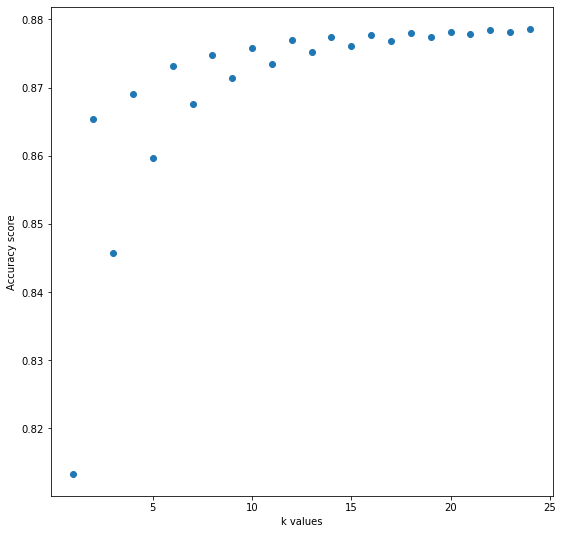

In [78]:
from tqdm import tqdm

k_range = range(1,25)
score = []

for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    score.append(knn.score(test_X, test_y))
    
plt.figure(figsize = (9, 9))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([5, 10, 15, 20, 25])

In [81]:
test_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,25,1,11,1,0,152,53,0.305108,0,1,0
1,1,40,1,28,0,1,7,111,0.187067,1,0,0
2,1,47,1,28,0,1,124,199,0.553787,1,0,0
3,1,24,1,27,1,1,152,187,0.396671,0,1,0
4,1,27,1,28,1,0,152,297,1.664623,0,1,0


In [82]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(train_X, train_y)
knn_train_pred = knn.predict(train_X)
knn_train_score = knn.score(train_X, train_y)
print('knn_train_score :', knn_train_score)
print('knn_train_accuracy_score :', accuracy_score(train_y, knn_train_pred))

knn_test_pred = knn.predict(test_X)
knn_test_score = knn.score(test_X, test_y)
print('knn_test_score :', knn_test_score)
print('knn_test_accuracy_score :', accuracy_score(test_y, knn_test_pred))

knn_orig_test_pred = knn.predict(test_preprocessed)

knn_train_score : 0.8791552280025059
knn_train_accuracy_score : 0.8791552280025059
knn_test_score : 0.8760987641363386
knn_test_accuracy_score : 0.8760987641363386


In [83]:
sample_submission['Response'] = knn_orig_test_pred

sample_submission.to_csv('Vehicle_knn_submission_res.csv',index=False)

In [84]:
nb = GaussianNB()
nb.fit(train_X, train_y)
nb_train_pred = nb.predict(train_X)
nb_train_score = accuracy_score(train_y, nb_train_pred)
print('nb_train_score :', nb_train_score)
print('train Confusion matrix :', confusion_matrix(train_y, nb_train_pred))
print('train Classification report : \n', classification_report(train_y, nb_train_pred))

nb_test_pred = nb.predict(test_X)
nb_test_score = accuracy_score(test_y, nb_test_pred)
print('nb_test_score :', nb_test_score)
print('test Confusion matrix :', confusion_matrix(test_y, nb_test_pred))
print('test Classification report : \n', classification_report(test_y, nb_test_pred))

nb_orig_test_pred = nb.predict(test_preprocessed)

nb_train_score : 0.7187252982252441
train Confusion matrix : [[187420  79981]
 [  5776  31710]]
train Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81    267401
         1.0       0.28      0.85      0.43     37486

    accuracy                           0.72    304887
   macro avg       0.63      0.77      0.62    304887
weighted avg       0.89      0.72      0.77    304887

nb_test_score : 0.7163810973209834
test Confusion matrix : [[46824 20174]
 [ 1444  7780]]
test Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     66998
         1.0       0.28      0.84      0.42      9224

    accuracy                           0.72     76222
   macro avg       0.62      0.77      0.62     76222
weighted avg       0.89      0.72      0.76     76222



In [85]:
sample_submission['Response'] = nb_orig_test_pred

sample_submission.to_csv('Vehicle_NB_submission_res.csv',index=False)

In [87]:
LR = LogisticRegression(max_iter=500)
LR.fit(train_X, train_y)
print('Coefficient :', LR.coef_)
print('model.intercept_ :', LR.intercept_)

print('\n')
LR_train_pred = LR.predict(train_X)
print('Train Accuracy')
print('accuracy score', accuracy_score(train_y, LR_train_pred))
print('f1 score', f1_score(train_y, LR_train_pred))
print('Confusion matrix \n', confusion_matrix(train_y, LR_train_pred))
print('Classification report : \n', classification_report(train_y, nb_train_pred))

print('\n')
LR_test_pred = LR.predict(test_X)
print('Test Accuracy')
print('accuracy score', accuracy_score(test_y, LR_test_pred))
print('f1 score', f1_score(test_y, LR_test_pred))
print('Confusion matrix \n', confusion_matrix(test_y, LR_test_pred))
print('test Classification report : \n', classification_report(test_y, nb_test_pred))

print('\n')
LR_orig_test_pred = LR.predict(test_preprocessed)

C:\Users\maham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficient : [[ 1.20563651e-01 -2.71420328e-02 -4.01190689e-01 -5.12442082e-04
  -4.08965840e+00  2.09202660e+00 -2.52479108e-03 -1.61164787e-05
   4.59781324e-02 -3.66610239e-02 -1.25811459e+00  1.54922701e-01]]
model.intercept_ : [-1.14541695]


Train Accuracy
accuracy score 0.8769478528110415
f1 score 0.0005860571672127653
Confusion matrix 
 [[267359     42]
 [ 37475     11]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81    267401
         1.0       0.28      0.85      0.43     37486

    accuracy                           0.72    304887
   macro avg       0.63      0.77      0.62    304887
weighted avg       0.89      0.72      0.77    304887



Test Accuracy
accuracy score 0.8788276350659915
f1 score 0.00021649707728945656
Confusion matrix 
 [[66985    13]
 [ 9223     1]]
test Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81   

In [88]:
sample_submission['Response'] = LR_orig_test_pred

In [89]:
sample_submission.to_csv('Vehicle_submission_res.csv',index=False)

In [90]:
RF = RandomForestClassifier()
RF.fit(train_X, train_y)

print('Train Accuracy')
RF.train_pred = RF.predict(train_X)
RF_train_score = accuracy_score(train_y, RF.train_pred)
print('RF_train_score :', RF_train_score)

print('Test Accuracy')
RF.test_pred = RF.predict(test_X)
RF_test_score = accuracy_score(test_y, RF.test_pred)
print('RF_test_score :', RF_test_score)

Train Accuracy
RF_train_score : 0.999872083755621
Test Accuracy
RF_test_score : 0.8670724987536407


In [91]:
n_estimator_ = [25,50]
max_depth_ = [1,2,3,4,5,None]
min_sample_leaf_ = [1,2,3]

In [92]:
RF1_train_score1 = []
RF1_test_score1 = []
parameters = []
for i in n_estimator_:
    for j in max_depth_:
        for k in min_sample_leaf_:
            RF1 = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k)
            RF1.fit(train_X, train_y)
            RF1_train_pred = RF1.predict(train_X)
            RF1_train_score = accuracy_score(train_y, RF1_train_pred)
            RF1_train_score1.append(RF1_train_score)
            RF1_test_pred = RF1.predict(test_X)
            RF1_test_score = accuracy_score(test_y, RF1_test_pred)
            RF1_test_score1.append(RF1_test_score)
            para = str(i)+" "+str(j)+" "+str(k)
            parameters.append(para)

In [93]:
parameters[RF1_test_score1.index(max(RF1_test_score1))]


'25 1 1'

In [94]:
RF = RandomForestClassifier(n_estimators=25, max_depth=1, min_samples_leaf=1)
RF.fit(train_X, train_y)

print('Train Accuracy')
RF.train_pred = RF.predict(train_X)
RF_train_score = accuracy_score(train_y, RF.train_pred)
print('RF_train_score :', RF_train_score)

print('Test Accuracy')
RF.test_pred = RF.predict(test_X)
RF_test_score = accuracy_score(test_y, RF.test_pred)
print('RF_test_score :', RF_test_score)

RF_orig_test_pred = RF.predict(test_preprocessed)

Train Accuracy
RF_train_score : 0.8770495298258043
Test Accuracy
RF_test_score : 0.8789850699273176
